# 📘 Exploratory Data Analysis (EDA)
---
This notebook contains the code and explanation for **Exploratory Data Analysis (EDA)**.

## 📊 Load & Explore Dataset


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dummy_telkomsel_data.csv")
df.head()

,user_id,age,city,monthly_usage_gb,device_type,tenure_months,is_4g,segment
0,1000,56,Bandung,3.68,mid-range,44,0,C
1,1001,46,Medan,0.79,feature,15,0,B
2,1002,32,Makassar,6.38,low-end,35,1,C
3,1003,25,Jakarta,2.31,feature,48,0,C
4,1004,38,Surabaya,5.84,low-end,50,0,C


## 🧼 Basic Data Cleaning

In [2]:
# Check for nulls
df.isnull().sum()

user_id             0
age                 0
city                0
monthly_usage_gb    0
device_type         0
tenure_months       0
is_4g               0
segment             0
dtype: int64

In [3]:
# Check data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   city              10000 non-null  object 
 3   monthly_usage_gb  10000 non-null  float64
 4   device_type       10000 non-null  object 
 5   tenure_months     10000 non-null  int64  
 6   is_4g             10000 non-null  int64  
 7   segment           10000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 625.1+ KB


## 📈 Descriptive Statistics & Distribution

In [4]:
# Summary statistics
df.describe()

,user_id,age,monthly_usage_gb,tenure_months,is_4g
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5999.50000,38.546400,2.994993,30.050100,0.296600
std,2886.89568,12.014287,3.002018,17.020727,0.456781
min,1000.00000,18.000000,0.000000,1.000000,0.000000
25%,3499.75000,28.000000,0.850000,16.000000,0.000000
50%,5999.50000,39.000000,2.050000,30.000000,0.000000
75%,8499.25000,49.000000,4.150000,45.000000,1.000000
max,10999.00000,59.000000,25.900000,59.000000,1.000000


Matplotlib is building the font cache; this may take a moment.


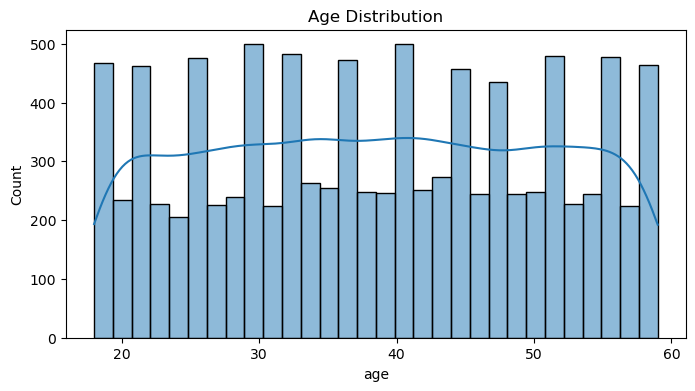

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

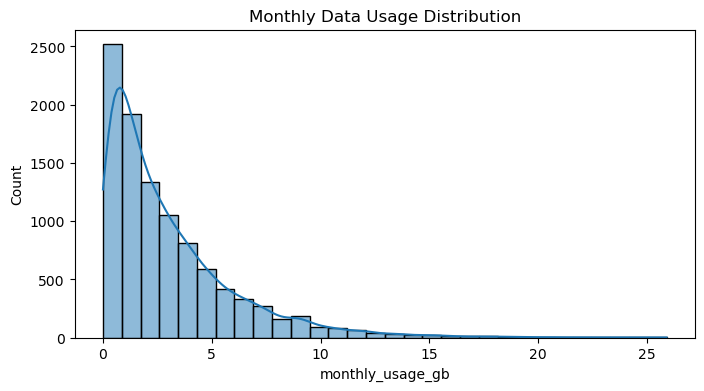

In [6]:
# Distribution of monthly usage
plt.figure(figsize=(8, 4))
sns.histplot(df['monthly_usage_gb'], bins=30, kde=True)
plt.title('Monthly Data Usage Distribution')
plt.show()

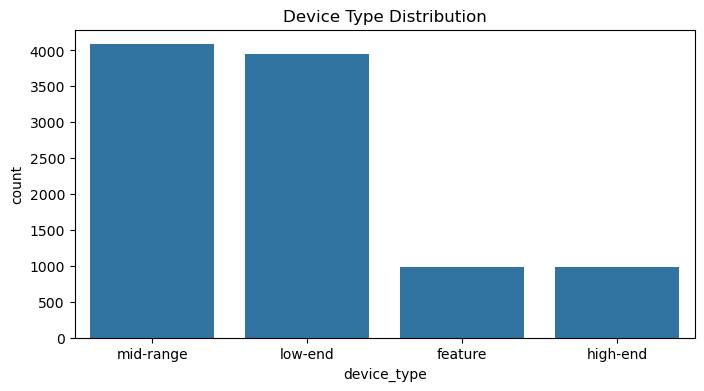

In [7]:
# Countplot for device types
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='device_type', order=df['device_type'].value_counts().index)
plt.title('Device Type Distribution')
plt.show()

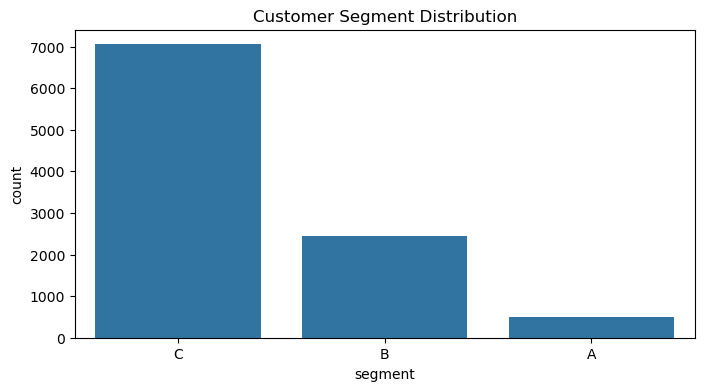

In [8]:
# Countplot for segment
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='segment', order=df['segment'].value_counts().index)
plt.title('Customer Segment Distribution')
plt.show()

## 📊 Correlation Heatmap

In [14]:
df_encoded.head()

,user_id,age,city,monthly_usage_gb,device_type,tenure_months,is_4g,segment
0,1000,56,Bandung,3.68,3,44,0,C
1,1001,46,Medan,0.79,0,15,0,B
2,1002,32,Makassar,6.38,2,35,1,C
3,1003,25,Jakarta,2.31,0,48,0,C
4,1004,38,Surabaya,5.84,2,50,0,C


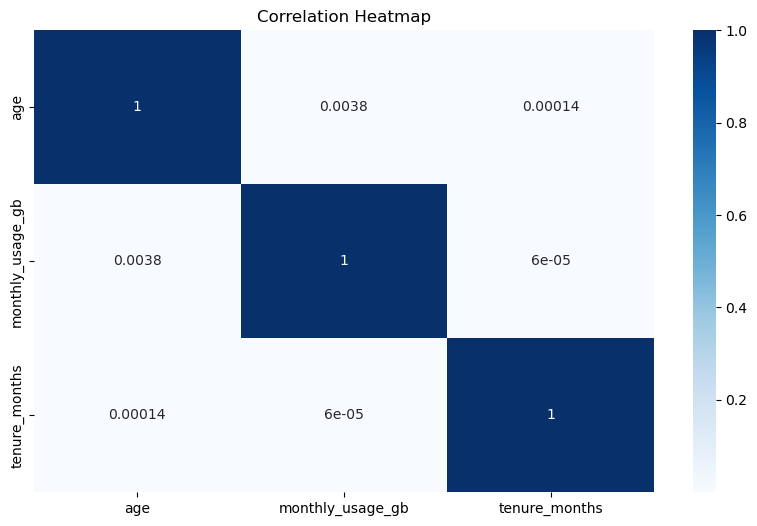

In [15]:
# Encode categorical columns for correlation matrix
df_encoded = df.copy()
df_encoded['device_type'] = df_encoded['device_type'].astype('category').cat.codes
corr = df_encoded[['age', 'monthly_usage_gb', 'tenure_months']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()